# Task 1.2: Signal Prediction

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from helper import *

### Load data

In [3]:
# Load data
df = pd.read_csv("../data/training1_no_incidents.csv")
df['DATETIME'] = pd.to_datetime(df['DATETIME'])
df.set_index('DATETIME', inplace=True)

### Predict w/ various sizes and calculate errors 

In [4]:
# Define features and windows
features = ['L_T1', 'L_T2']
windows = [2,3,4,5]

# Predict results, calculate errors
results, data = predict_sliding_windows(df, features, windows)

In [5]:
# Print results
for feature in features:
    print("Results %s:" % feature)
    with pd.option_context('float_format', '{:.3f}'.format):
        display(pd.DataFrame(results[feature]))

Results L_T1:


,2,3,4,5
MAE,0.097,0.188,0.275,0.355
MSE,0.014,0.052,0.110,0.183


Results L_T2:


,2,3,4,5
MAE,0.189,0.360,0.513,0.650
MSE,0.053,0.194,0.398,0.644


# Plot predictions

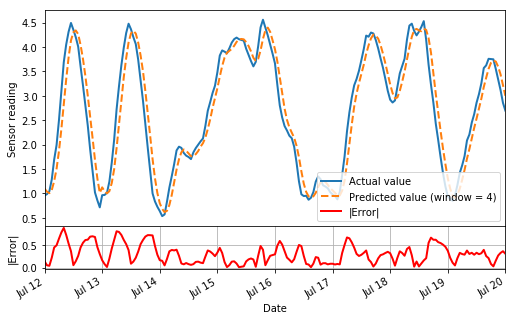

In [6]:
plot_feature = 'L_T1'
plot_winsize = 4

df_slice = get_time_slice(data, "2014-07-12", "2014-07-20")

plot_prediction(df_slice[plot_feature], df_slice['%s_%d' % (plot_feature, plot_winsize)], df_slice['%s_%d_err' % (plot_feature, plot_winsize)], save='output/predictions.pdf')